In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display 
# allows the use of display from dataframes
import matplotlib.pyplot as plt
import sklearn

In [2]:
# going to read the data 
data = pd.read_csv("F:\diabetes.csv")

In [3]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# processing the data

In [5]:
# count the nuber of missing value in SkinThickness column 
print("Number of missing value in SkinThickness Columns are : ",(data["SkinThickness"]==0).sum())
# count the number of missing value in insulin column
print("Number of missing value in insulin column are : ",(data["Insulin"]==0).sum())


Number of missing value in SkinThickness Columns are :  227
Number of missing value in insulin column are :  374


In [7]:
# converting skinthickness and insuin column to floating to avoid future conflicts
data["Insulin"] = data["Insulin"].astype(float)
data["SkinThickness"] = data["SkinThickness"].astype(float)

In [8]:
# Replacing the zero value in column with the mean value of that particular column
data.loc[data["SkinThickness"]==0,"SkinThickness"] = data["SkinThickness"].mean()
data.loc[data["Insulin"]==0,"Insulin"] = data["Insulin"].mean()

In [9]:
# Now just check that is there any zero value left is in our data
print((data["SkinThickness"] ==0).sum())
print((data["Insulin"] ==0).sum())

0
0


In [10]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [13]:
# lets take the record of all the values
n_records = len(data.index)

# Number of records where the outcome is 1 means the person are diagnosed with diatic
n_1 = data[data.Outcome == 1].shape[0]

# Number of records where the outcome is 0 means number of person not having diabtese

n_0 = data[data.Outcome == 0].shape[0]

# percentage of individual whose outcome is 1

n1_percentage = (n_1/n_records)*100

print("Total number of records :{} ".format(n_records))
print("Number of person diagnosed with diabtese :{} ".format(n_1))
print("Total number of person not having diabtese :{} ".format(n_0))
print("Percentage of people who are not diabtic :{}% ".format(n1_percentage))

Total number of records :768 
Number of person diagnosed with diabtese :268 
Total number of person not having diabtese :500 
Percentage of people who are not diabtic :34.89583333333333% 


In [15]:
# lets split our data into target and features label

# Target Label
outcome_r = data["Outcome"]

# other features 

features_r = data.drop("Outcome",axis =1)

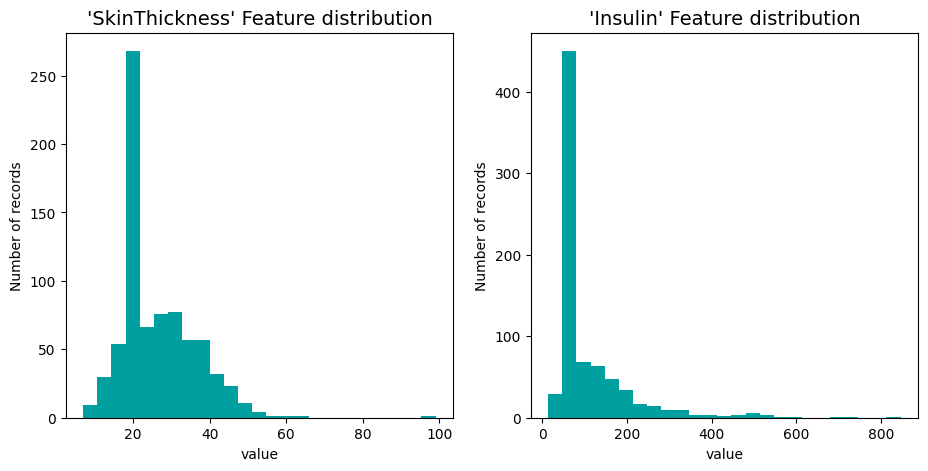

In [23]:
# lets visualize the Skewed continuous feature of original data

fig = plt.figure(figsize = (11,5))

# Skewed feature plotting 

for i,feature in enumerate(["SkinThickness","Insulin"]):
    ax = fig.add_subplot(1,2,i+1)
    ax.hist(data[feature],bins = 25,color = "#00A0A0")
    ax.set_title("'%s' Feature distribution"%(feature),fontsize = 14)
    ax.set_xlabel("value")
    ax.set_ylabel("Number of records")

In [19]:
# visualiztion code for displaying skewed distributions of feature 

In [28]:
# fixing the skewed data by distributing the data of features

def distribution(data,transformed = False):

    # create figure
    fig = plt.figure(figsize = (11,5));

    # skewed feature plotting
    for i,feature in enumerate(["SkinThickness","Insulin"]):
       ax = fig.add_subplot(1,2,i+1)
       ax.hist(data[feature],bins = 25,color = "#00A0A0")
       ax.set_title("'%s' Feature distribution"%(feature),fontsize = 14)
       ax.set_xlabel("value")
       ax.set_ylabel("Number of records")


    # Plotting Aesthetcs 
    if transformed:
        # here if the title is true the data is transformed into log_transformed distribution
        fig.suptitle("log_transformed Distributions ", 
                     fontsize =16,y =1.03)
    else:
        # here if the title is false the data is transformef into Skewed Distribution
        fig.suptitle("Skewed Distribution  ", 
                     fontsize =16,y =1.03)

    fig.tight_layout()
    plt.show()

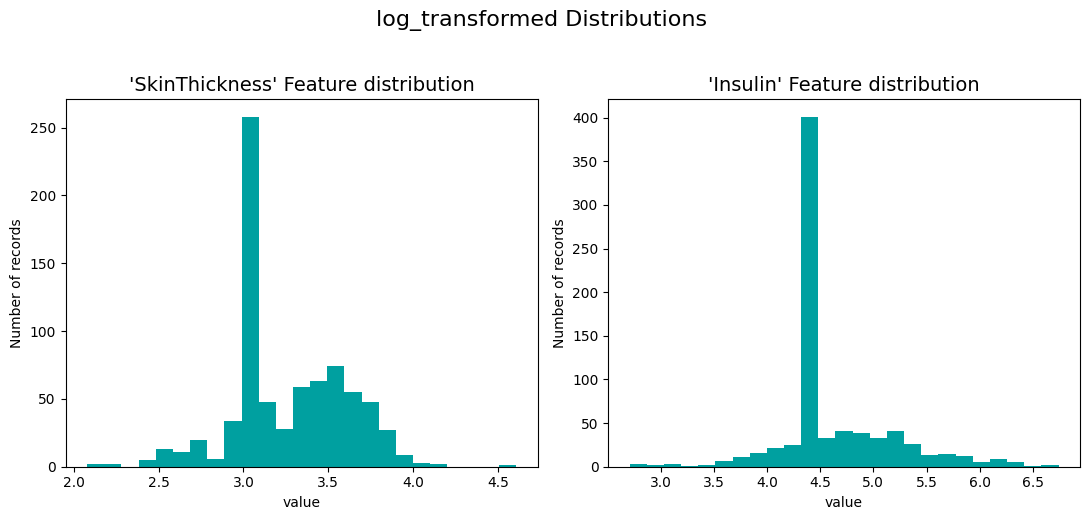

In [29]:
# Log transformation of the Skewed feature 

skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame (data = features_r)
# Aplying the lambda function to transform the log transformmatiio
features_log_transformed[skewed] = features_r[skewed].apply(lambda x:np.log(x+1))

# visualizing the new log distribution

distribution(features_log_transformed,transformed = True)

In [32]:
# lets scale our data from MinMAxScaler to avoid conflicts 

from sklearn.preprocessing import MinMaxScaler

# initialize a scaler and then apply it to features  the default value is [0,1]
scaler = MinMaxScaler()
numerical = ['Insulin','SkinThickness','DiabetesPedigreeFunction']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# here is an example of a record with scaling applied 
display(features_log_minmax_transform.head(n=5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33
